# FINAL PROJECT- ML model for Subscription-Prediction 

- In this Project, we are going to perform a full supervised ML model on a "Bank-Marketing" dataset of a portugues bank. 
 This dataset is originally from the [**UCI machine learning repository**](https://archive.ics.uci.edu/dataset/222/bank+marketing). The objective of the dataset is to whether a client will subscribe to a term deposit after market campaign(using or more phone calls to customer)
based on certain diagnostic measurements included in the dataset. 

# Part I: EDA & Data Cleaning/Polishing

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv('C:/Users/simon/Final-Project-LHL/bank-full.csv')
df.head(5)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# Summary of the numerical features:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


#### Summary of important observations in our numerical columns:
- Age: **Ranges**`(18 to 95)`; **Average Age**: `41 years old`
- Bank balance : **Ranges**`(Euro: -8019.00 to 102,127.00)`; **Average Balance**: `Euro 1362`
- Call durations(in seconds): **Ranges**`(0 to 4918)`; **Avarege duration**:`258 seconds`
- Campaign(number of calls during current campaing to a client): **Ranges**`(1 to 63)`; **Average compaign**: `3 days`
- Pdays(Days passed after last contact): **Ranges**`(-1 to 871)`; **Average Pdays**: `40 days`
- Previous(number of calls done before this campaign to a client): **Ranges**`(0 to 275)`; **Average**: `0.58 `                                         

    

In [6]:
# Summary of the Categorical features:
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


#### Summary of important observations in Categorical columns:
- **21.5%** of our clients have a `blue-collar job`
- **60%** of our clients are `married`.
- **51%** of our clients have `secondary` as education level.
- **98%** of our clients has not `default` credit
- **88%** `did not subscribe to the long term deposit` after the campaign.

#### Cleaning & polishing

In [7]:
# Permanently remove the poutcome column as most of its value is "unknown"
df.drop(columns=['poutcome'], inplace= True)


In [8]:
# Replace name of target variable y with outcome to be Explanatory
df.rename(columns={'y': 'subscription'}, inplace=True)


In [9]:
# Drop the rows that have the label "unknown" in both the job & education columns:
df.drop(df[(df['job'] == 'unknown') | (df['education'] == 'unknown')].index, inplace=True)


In [10]:

# Take the numerical variables to check the dataset distribution
num_feat = df[['age','balance', 'duration', 'campaign','pdays','previous','subscription']]


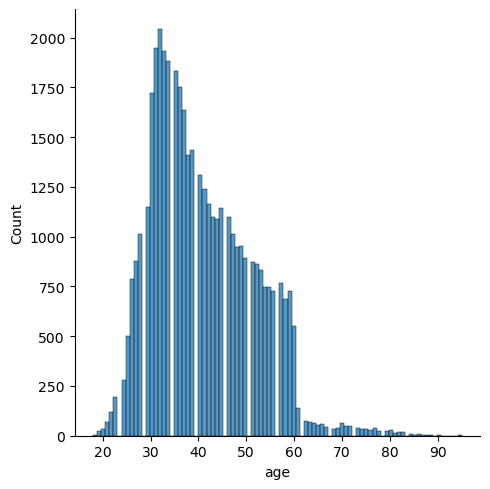

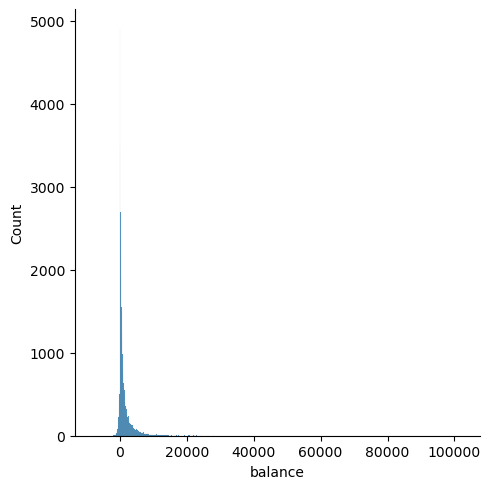

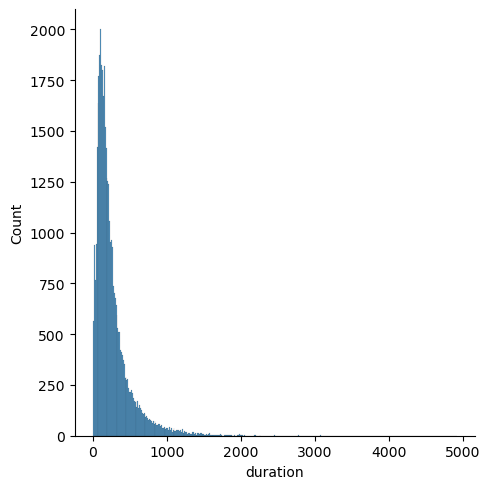

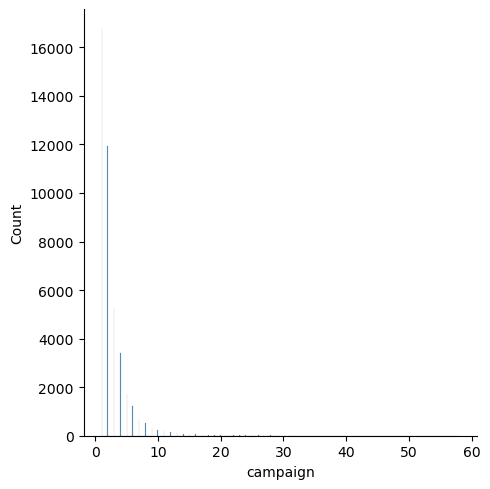

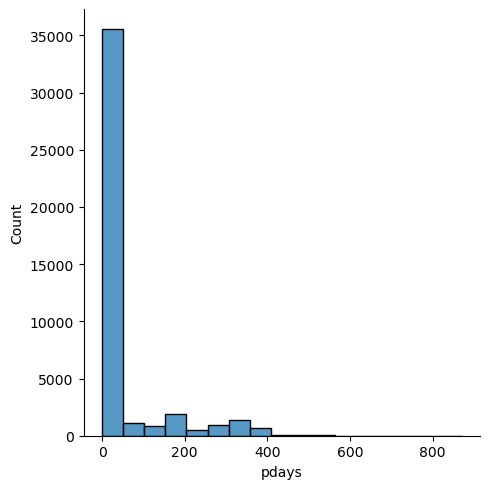

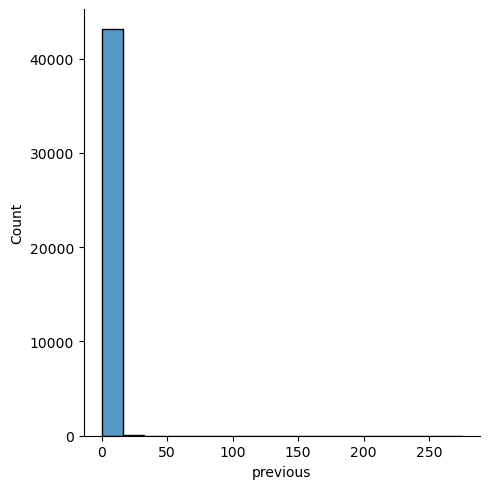

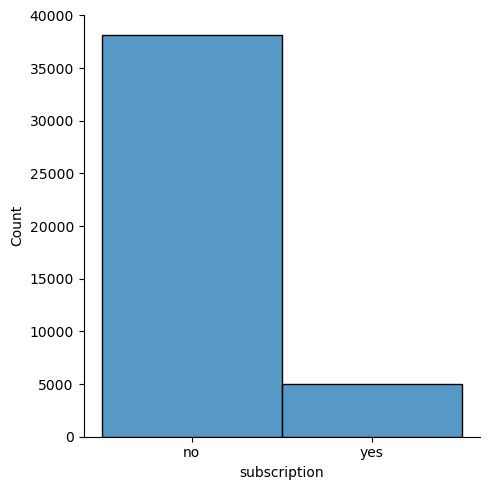

In [11]:
for column in num_feat:
    sns.displot(num_feat[column])

- All the above numerical features except `**age**` are skewed and neeeded to be normalized using logarithmic transformation:
- Class imbalance in the target variable(outcome)

In [12]:
#Changing the binary outcome column in to numeric values of 1 and 0 :
num_feat.loc[:, 'subscription'] = num_feat['subscription'].map({'yes': 1, 'no': 0})
num_feat

,age,balance,duration,campaign,pdays,previous,subscription
0,58,2143,261,1,-1,0,0
1,44,29,151,1,-1,0,0
2,33,2,76,1,-1,0,0
5,35,231,139,1,-1,0,0
6,28,447,217,1,-1,0,0
...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,1
45207,71,1729,456,2,-1,0,1
45208,72,5715,1127,5,184,3,1
45209,57,668,508,4,-1,0,0


### Using a heatmap to observe the correlations between various predictor variables & target variable(outcome)


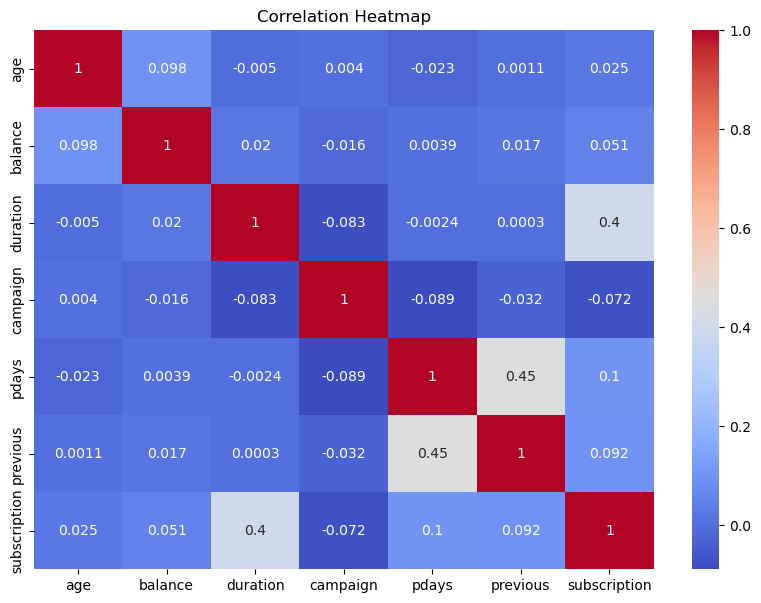

In [13]:
corr_matrix = num_feat.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

#### Scatter Plot to look in to correlation deeper:

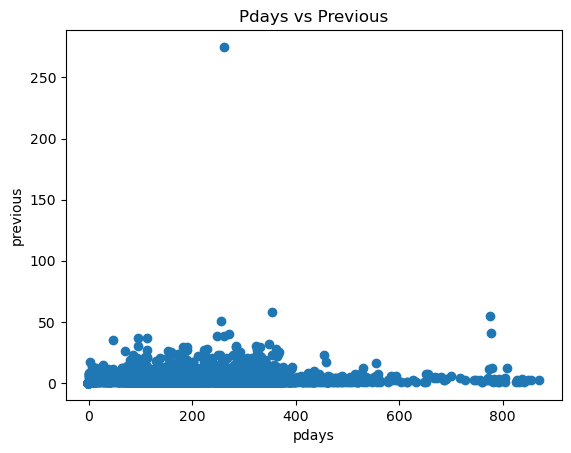

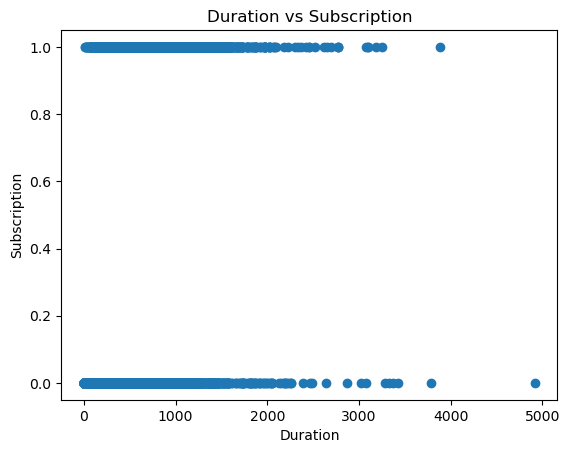

In [14]:

# Scatter plot between pdays and previous
plt.scatter(num_feat['pdays'], num_feat['previous'])
plt.xlabel('pdays')
plt.ylabel('previous')
plt.title('Pdays vs Previous')
plt.show()

# Scatter plot between Milk and Detergents_Paper
plt.scatter(num_feat['duration'], num_feat['subscription'])
plt.xlabel('Duration')
plt.ylabel('Subscription')
plt.title('Duration vs Subscription')
plt.show()

In [15]:
# Check Class imbalance in the outcome column:
value_counts = num_feat['subscription'].value_counts()
print(value_counts)

subscription
0    38172
1     5021
Name: count, dtype: int64


- Noticed class imbalance that can potentially lead our model to predict in favour one over the other. Our outcome columns has 88.38% (labeled as 0) and 11.62% ( labled as 1).

# PART II: Preprocessing & Feature Engineering

####  Scaling the numerical features

In [16]:
num_feat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43193 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           43193 non-null  int64 
 1   balance       43193 non-null  int64 
 2   duration      43193 non-null  int64 
 3   campaign      43193 non-null  int64 
 4   pdays         43193 non-null  int64 
 5   previous      43193 non-null  int64 
 6   subscription  43193 non-null  object
dtypes: int64(6), object(1)
memory usage: 2.6+ MB


#### Scaling numerical featuers:

In [17]:
# Scaling numerical features excluding the target variable

from sklearn.preprocessing import StandardScaler

# Separate outcome column as it is binary
num_feat.loc[:, 'subscription'] = num_feat['subscription'].astype(int)
outcome_column = num_feat['subscription']
num_sc = num_feat.drop(columns=['subscription'])

# Standardization using StandardScaler
scaler = StandardScaler()
scaled_num_feat = scaler.fit_transform(num_sc)

# Create a new DataFrame with the standardized values
scaled_df = pd.DataFrame(scaled_num_feat, columns=['Age', 'balance', 'duration', 'campaigns', 'pdays', 'previous'])

# The 'scaled_df' DataFrame contains the standardized values of your numerical features
print(scaled_df)


            Age   balance  duration  campaigns     pdays  previous
0      1.639561  0.259354  0.010368  -0.573827 -0.412311 -0.250730
1      0.307816 -0.435568 -0.415726  -0.573827 -0.412311 -0.250730
2     -0.738556 -0.444443 -0.706245  -0.573827 -0.412311 -0.250730
3     -0.548306 -0.369166 -0.462209  -0.573827 -0.412311 -0.250730
4     -1.214179 -0.298161 -0.160070  -0.573827 -0.412311 -0.250730
...         ...       ...       ...        ...       ...       ...
43188  0.973688 -0.173904  2.783852   0.078925 -0.412311 -0.250730
43189  2.876182  0.123262  0.765716  -0.247451 -0.412311 -0.250730
43190  2.971307  1.433555  3.364890   0.731677  1.429961  1.035364
43191  1.544437 -0.225513  0.967143   0.405301 -0.412311 -0.250730
43192 -0.358057  0.531537  0.397726  -0.247451  1.469794  4.464947

[43193 rows x 6 columns]


#### Normalizing distribution in columns with skewed distribution

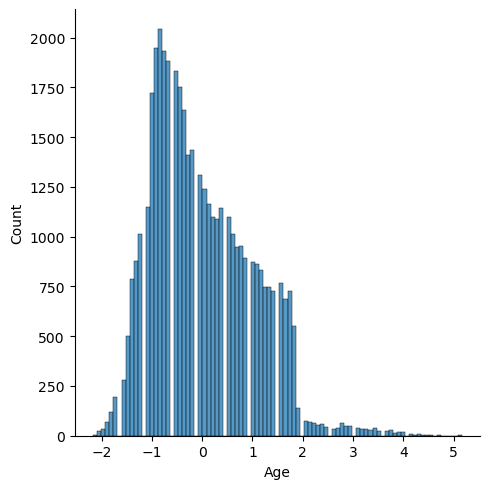

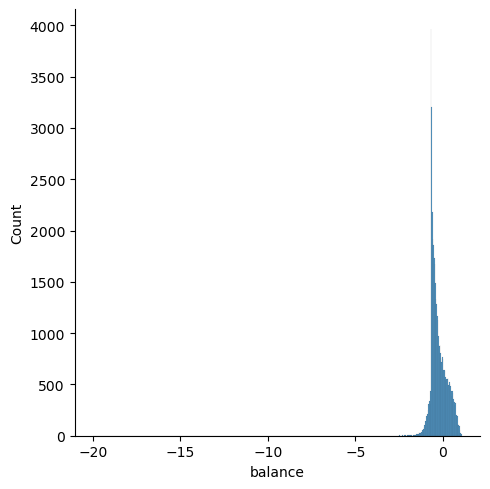

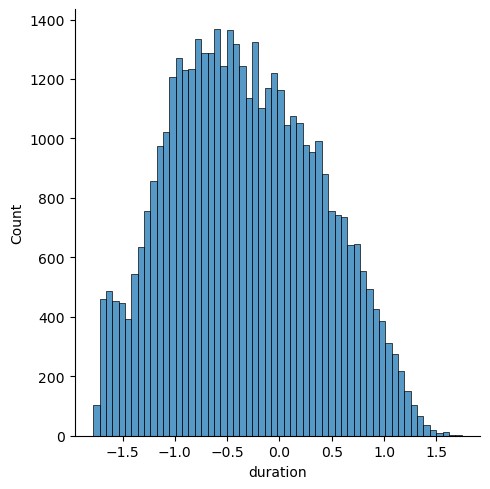

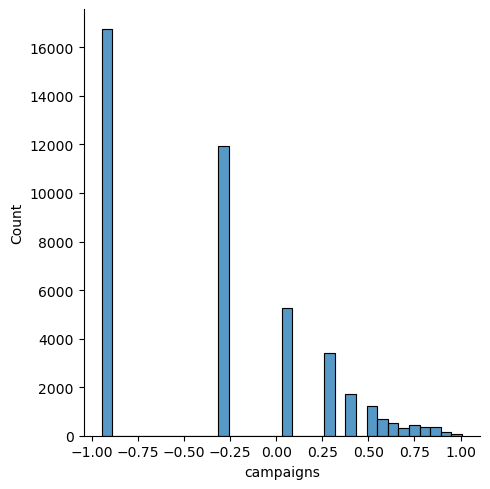

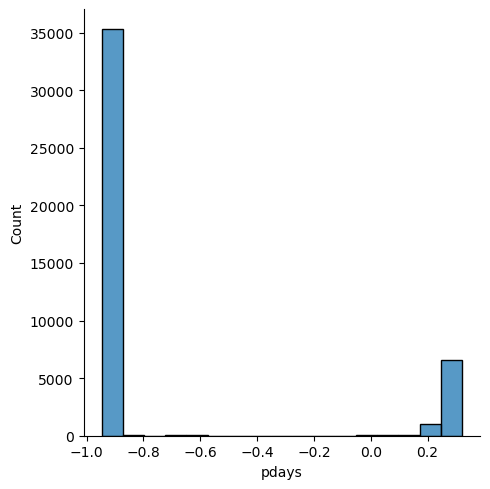

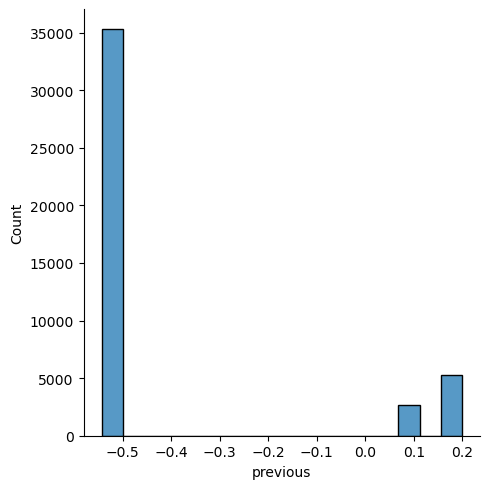

In [18]:
# Normalizing the columns with skewed distribution using yeojohnson(as there are 0 & -ve values):
from scipy.stats import yeojohnson
columns_to_transform = scaled_df.columns.tolist()
for column in columns_to_transform:
    if column != 'Age':
        transformed_data, _ = yeojohnson(scaled_df[column])
        scaled_df[column] = transformed_data
        
for column in scaled_df:
    sns.displot(scaled_df[column])



In [19]:
# Change data type of outcome column & add it to our numerical columns:
scaled_df['subscription'] = outcome_column.reset_index(drop=True)

scaled_num_feat = scaled_df
scaled_num_feat['subscription'] = scaled_num_feat['subscription'].astype(int)
scaled_num_feat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43193 entries, 0 to 43192
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           43193 non-null  float64
 1   balance       43193 non-null  float64
 2   duration      43193 non-null  float64
 3   campaigns     43193 non-null  float64
 4   pdays         43193 non-null  float64
 5   previous      43193 non-null  float64
 6   subscription  43193 non-null  int32  
dtypes: float64(6), int32(1)
memory usage: 2.1 MB


#### Convert Categorical columns in to binaries

In [20]:
#Encoding the columns Job, Marital  & Education to prepare for modeling:
# Columns to include in the encoding
columns_to_encode = ['job','marital','education']

# Perform one hot encoding on the specified columns
Encoded_df = pd.get_dummies(df, columns=columns_to_encode, dtype=int)

# Select only categorical features in the resulting dataframe:
cat_feat = ['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid','job_management', 'job_retired', 
            'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed','marital_divorced', 
            'marital_married', 'marital_single','education_primary', 'education_secondary', 'education_tertiary','default',
            'housing','loan']

encoded_cat_feat = Encoded_df[cat_feat]
encoded_cat_feat

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default,housing,loan
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,no,yes,no
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,no,yes,no
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,no,yes,yes
5,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,no,yes,no
6,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,no,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,no,no,no
45207,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,no,no,no
45208,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,no,no,no
45209,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,no,no,no


#### Change the binary(boolean & object data type) columns in to numerical:

In [21]:
# Replace binary columns of "Yes" or "No" in to 1 & 0 to be suitable for our ML model

# encoded_cat_feat.info()
mapping = {'yes': 1, 'no': 0}

# Map 'yes' and 'no' values to 1 and 0
columns_to_convert = ['default', 'housing', 'loan']
encoded_cat_feat.loc[:,columns_to_convert] = encoded_cat_feat[columns_to_convert].replace(mapping)

# Convert 'default', 'housing', and 'loan' columns to integer data type
encoded_cat_feat.loc[:,columns_to_convert] = encoded_cat_feat[columns_to_convert].astype(int)




In [22]:
# Combine the categorical and numerical dataframes to prepare for splitting and modeling:
#ready_df = pd.concat([encoded_cat_feat, scaled_num_feat], axis=1)
# Reset the index of encoded_cat_feat to RangeIndex
encoded_cat_feat_reset = encoded_cat_feat.reset_index(drop=True)

# Combine both DataFrames horizontally using pd.concat
ready_df = pd.concat([scaled_num_feat, encoded_cat_feat_reset], axis=1)


### Preparing & Splitting Dataset in to training and testing dataset:

In [23]:

# Separare the outcome column(dependent variable) from the overall dataframe:
outcome_df = ready_df[['subscription']].copy()

# Drop the 'Outcome' column from the original DataFrame to keep only the features
features_df = ready_df.drop(columns=['subscription'])


#### Shuffling data randomly 

In [24]:
#Defining x, y variables for building model
from sklearn.utils import shuffle

X, y = features_df, outcome_df

#shuffling data randomly to remove underlying ordering and patterns:
X, y = shuffle(X, y, random_state=27)

print(f'Dataset has {X.shape[0]} data points and {X.shape[1]} features')
print(f'Dataset has {y.shape[0]} data points and {y.shape[1]} features')

Dataset has 43193 data points and 26 features
Dataset has 43193 data points and 1 features


#### Splitting data:

In [25]:
# Splitting data in to train/test
from sklearn.model_selection import train_test_split
train_ratio = 0.80
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, train_size=train_ratio) 

print(f'{len(X_train)} training samples and {len(X_test)} test samples')


34554 training samples and 8639 test samples


#### Handling Class imbalance in our y variable(outcome):

In [34]:
#class weights for handling class imbalance in our binary classification problem. 
# Calculate class weights for class 0 and class 1
class_weights = {0: len(y_train) / (2 * (y_train == 0).sum()), 1: len(y_train) / (2 * (y_train == 1).sum())}

# Calculate the sum of class weights
sum_class_weights = sum(class_weights.values())

# Normalize class weights so that they sum up to 1
class_weight_0 = class_weights[0] / sum_class_weights
class_weight_1 = class_weights[1] / sum_class_weights

# Calculate class weights for class 0 and class 1
class_weights = {0: len(y_train) / (2 * (y_train == 0).sum()), 1: len(y_train) / (2 * (y_train == 1).sum())}

# Calculate the sum of class weights
sum_class_weights = sum(class_weights.values())

# Normalize class weights so that they sum up to 1
class_weight_0 = class_weights[0] / sum_class_weights
class_weight_1 = class_weights[1] / sum_class_weights

# PART III: Training & Evaluating ML model

#### Training our model __(Using Random Forest)__

In [43]:

from sklearn.ensemble import RandomForestClassifier
# Assuming class_weights is a pandas Series containing class weights

rfc_model = RandomForestClassifier(class_weight={0: class_weight_0, 1: class_weight_1},random_state=0)


rfc_model.fit(X_train,y_train.values.ravel())

rfc_pred = rfc_model.predict(X_test)

print(rfc_pred)


C:\Users\simon\anaconda3\lib\site-packages\sklearn\utils\class_weight.py:65: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight[i] = class_weight[c]


[0 0 0 ... 0 0 1]


#### Evaluating RF model prediction:

In [44]:
from sklearn.metrics import accuracy_score, classification_report
# Accuracy Metrics
accuracy = accuracy_score(y_test, rfc_pred)
print("Accuracy:", accuracy)

# Print classification report for more detailed evaluation
print(classification_report(y_test, rfc_pred))

Accuracy: 0.8938534552610256
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7623
           1       0.60      0.29      0.39      1016

    accuracy                           0.89      8639
   macro avg       0.76      0.63      0.67      8639
weighted avg       0.88      0.89      0.88      8639



#### Hyperparameter tunning (Random Search method)

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# defining hyperparameter Search Space:
param_dist = {
    'n_estimators': sp_randint(100, 500),
    'max_depth': [None] + list(sp_randint(10, 100).rvs(10)),  # Generate 10 random integers in the range
    'min_samples_split': sp_randint(2, 30),
    'min_samples_leaf': sp_randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
}


In [ ]:
# Initializing, running RandomizedSearchCV

clf = RandomForestClassifier(random_state=0)

n_iter_search = 25  # Number of random parameter combinations to try
random_search = RandomizedSearchCV(
    clf, param_distributions=param_dist, n_iter=n_iter_search, cv=3, scoring='accuracy', n_jobs=-1
)

random_search.fit(X_train, y_train)

#Getting the best hyperparameters & score
best_params = random_search.best_params_
best_score = random_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

In [ ]:
# Evaluation on test data:
from sklearn.metrics import confusion_matrix
best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy with Best Model:", test_accuracy)
print(classification_report(y_test, rfc_pred))


# PART IV: Findings & Conclusion